In [225]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset
used_cars_df = pd.read_csv('used_cars.csv')

## Exploratory data analysis (EDA) and data cleaning

The target for our regression problem here is the column *price*. 

Each row represent the characteristics of a car, and the corresponding sales price of said car. We are free to choose which of the available features to fit a model to, and try to predict the target with.

It's generally essential that we use our wits and domain expertise to pick and engineer good features for our model. Bad features will produce a bad model, with poor predictive power. In other word, a useless model.

**Remove a redundant column**

In [226]:
# remove the first column which looks like a copy of the index column

columns_to_keep = used_cars_df.columns[1:]
print(columns_to_keep)

Index(['car_name', 'registration_year', 'insurance_validity', 'fuel_type',
       'seats', 'kms_driven', 'ownsership', 'transmission',
       'manufacturing_year', 'mileage(kmpl)', 'engine(cc)', 'max_power(bhp)',
       'torque(Nm)', 'price(in lakhs)'],
      dtype='object')


In [227]:
used_cars_df = used_cars_df[columns_to_keep]

used_cars_df

,car_name,registration_year,insurance_validity,fuel_type,seats,kms_driven,ownsership,transmission,manufacturing_year,mileage(kmpl),engine(cc),max_power(bhp),torque(Nm),price(in lakhs)
0,2017 Mercedes-Benz S-Class S400,Jul-17,Comprehensive,Petrol,5,56000,First Owner,Automatic,2017,7.81,2996.0,2996.0,333.0,63.75
1,2020 Nissan Magnite Turbo CVT XV Premium Opt BSVI,Jan-21,Comprehensive,Petrol,5,30615,First Owner,Automatic,2020,17.40,999.0,999.0,9863.0,8.99
2,2018 BMW X1 sDrive 20d xLine,Sep-18,Comprehensive,Diesel,5,24000,First Owner,Automatic,2018,20.68,1995.0,1995.0,188.0,23.75
3,2019 Kia Seltos GTX Plus,Dec-19,Comprehensive,Petrol,5,18378,First Owner,Manual,2019,16.50,1353.0,1353.0,13808.0,13.56
4,2019 Skoda Superb LK 1.8 TSI AT,Aug-19,Comprehensive,Petrol,5,44900,First Owner,Automatic,2019,14.67,1798.0,1798.0,17746.0,24.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1548,2020 Hyundai Creta SX Opt Diesel AT BSVI,Aug-20,Comprehensive,Diesel,5,35000,First Owner,Automatic,2020,1493.00,11345.0,11345.0,250.0,17.41
1549,2022 Renault KWID 1.0 RXL Opt BSVI,2022,Third Party insurance,Petrol,5,10000,999 cc,2022,Power Steering,999.00,6706.0,6706.0,91.0,3.98
1550,2017 Honda WR-V i-VTEC S,Jun-17,Comprehensive,Petrol,5,49000,First Owner,Manual,2017,17.50,1199.0,1199.0,887.0,5.85
1551,2018 Volkswagen Polo 1.0 MPI Comfortline,May-18,Comprehensive,Petrol,5,40000,Second Owner,Manual,2018,18.78,999.0,999.0,75.0,4.75


**Keep only numerical columns, for now**

Many machine learning models require that the input are all numerical (since you can't do mathematic operations with anything else), and it is therefore essential that (when using models with that requirement) make sure that the data satisfies that condition.

Note that there are ways to transform any given column into numericals that we can work with, but let's hold on with that for now and only keep the features that already are.

In [228]:
used_cars_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1553 entries, 0 to 1552
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   car_name            1553 non-null   object 
 1   registration_year   1553 non-null   object 
 2   insurance_validity  1553 non-null   object 
 3   fuel_type           1553 non-null   object 
 4   seats               1553 non-null   int64  
 5   kms_driven          1553 non-null   int64  
 6   ownsership          1553 non-null   object 
 7   transmission        1553 non-null   object 
 8   manufacturing_year  1553 non-null   object 
 9   mileage(kmpl)       1550 non-null   float64
 10  engine(cc)          1550 non-null   float64
 11  max_power(bhp)      1550 non-null   float64
 12  torque(Nm)          1549 non-null   float64
 13  price(in lakhs)     1553 non-null   float64
dtypes: float64(5), int64(2), object(7)
memory usage: 170.0+ KB


In [229]:
used_cars_df = used_cars_df.select_dtypes(include=['int64', 'float64'])

used_cars_df

,seats,kms_driven,mileage(kmpl),engine(cc),max_power(bhp),torque(Nm),price(in lakhs)
0,5,56000,7.81,2996.0,2996.0,333.0,63.75
1,5,30615,17.40,999.0,999.0,9863.0,8.99
2,5,24000,20.68,1995.0,1995.0,188.0,23.75
3,5,18378,16.50,1353.0,1353.0,13808.0,13.56
4,5,44900,14.67,1798.0,1798.0,17746.0,24.00
...,...,...,...,...,...,...,...
1548,5,35000,1493.00,11345.0,11345.0,250.0,17.41
1549,5,10000,999.00,6706.0,6706.0,91.0,3.98
1550,5,49000,17.50,1199.0,1199.0,887.0,5.85
1551,5,40000,18.78,999.0,999.0,75.0,4.75


**Deal with missing data**

Let's try to find and mitigate missing data. Note that whether to remove data points is a very sensitive decision, and should be carefully considered. 

Augmenting and fixing the data is a better alternative, if the time to do so is available. 

All changes we do to the training data *will* affect our model's performance, either insignificantly or significantly - depending on the changes we've made, and to what extent.

In [230]:
# check for null-data

used_cars_df.isnull().sum()

seats              0
kms_driven         0
mileage(kmpl)      3
engine(cc)         3
max_power(bhp)     3
torque(Nm)         4
price(in lakhs)    0
dtype: int64

We'll opt for the lazy way out here, and remove the null data since it's affecting a very low amount of records (not a good argument btw). 

This is generally not a recommended approach though, it might be well worth fixing the data instead.

**Question**: What consequences on the data does our decision to remove these records potentially have?

In [231]:
used_cars_df = used_cars_df.dropna().reset_index(drop=True)

used_cars_df.isnull().sum()

seats              0
kms_driven         0
mileage(kmpl)      0
engine(cc)         0
max_power(bhp)     0
torque(Nm)         0
price(in lakhs)    0
dtype: int64

**Dealing with unreasonable data**

Usually, we have to spend considerable time to just clean the data and get rid of crap that has nested it's way into it.

Crap in data is very common in real life.

Let's begin by trying to understand the price column a bit better.

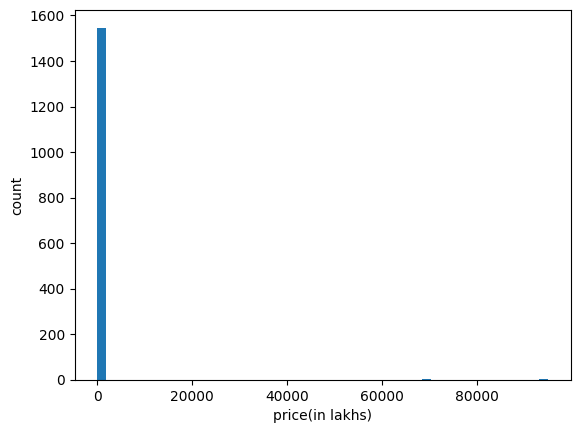

In [232]:
plt.hist(used_cars_df['price(in lakhs)'], bins=50);
plt.xlabel('price(in lakhs)');
plt.ylabel('count');

That's strange, it looks like there are a few cars that are extremely expensive. This is not incorrect per se, but let's look deeper.

In [233]:
used_cars_df[used_cars_df['price(in lakhs)']<=12.5]

,seats,kms_driven,mileage(kmpl),engine(cc),max_power(bhp),torque(Nm),price(in lakhs)
1,5,30615,17.40,999.0,999.0,9863.0,8.99
5,5,42000,18.70,1199.0,1199.0,887.0,5.45
6,5,36739,18.90,1197.0,1197.0,8186.0,5.12
7,5,76000,15.80,1591.0,1591.0,1213.0,9.30
9,5,28783,17.00,1198.0,1198.0,1085.0,8.02
...,...,...,...,...,...,...,...
1543,7,26500,26.11,1462.0,1462.0,8663.0,11.50
1545,5,10000,999.00,6706.0,6706.0,91.0,3.98
1546,5,49000,17.50,1199.0,1199.0,887.0,5.85
1547,5,40000,18.78,999.0,999.0,75.0,4.75


Ok, so we have 3 records of cars that looks to suspicous.

Since Ali has been in India, he knows that 1 lakh is a common indian measure that means one hundred thousand (indian rupees, in this case).

70000 lakhs is therefore 70000 * 100.000 = 7000000000 (indian rupees).

Converting this to Swedish currency we get 877 447 200 SEK. Not reasonably at all. 

Let's just remove these records for simplicity, and plot again

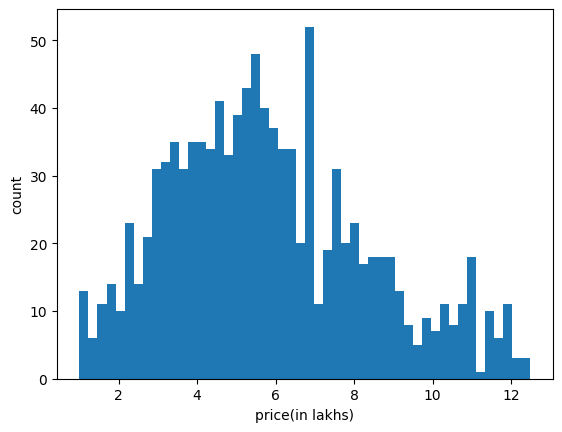

In [234]:
used_cars_df = used_cars_df[used_cars_df['price(in lakhs)']<12.5].reset_index(drop=True)

plt.hist(used_cars_df['price(in lakhs)'], bins=50);

plt.xlabel('price(in lakhs)');
plt.ylabel('count');

Ah, now it looks much more realistic!

Ok, great. Let's also take a look at kms_driven

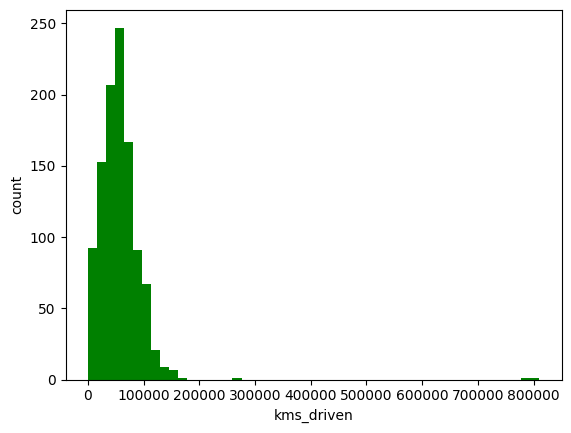

In [235]:
plt.hist(used_cars_df['kms_driven'], bins=50, color='green');

plt.xlabel('kms_driven');
plt.ylabel('count');

Well, this also looks a little suspicious. Perhaps?

In [236]:
used_cars_df[used_cars_df['kms_driven']>150000]

,seats,kms_driven,mileage(kmpl),engine(cc),max_power(bhp),torque(Nm),price(in lakhs)
675,5,790000,18.15,998.0,998.0,11835.0,9.75
709,5,810000,21.70,1498.0,1498.0,9896.0,9.00
941,7,176000,12.80,2494.0,2494.0,102.0,4.40
962,7,260000,12.80,2494.0,2494.0,102.0,6.25


Ok, so there are only 6 cars that have droven over 150.000 kms. Let's remove them, since they deviate in too much in values from our other values, and thus much deteroriate the models performance.

We can of course do this if we'd like, but let's think for a moment before doing so. What limitations are we putting on our model by removing these records?

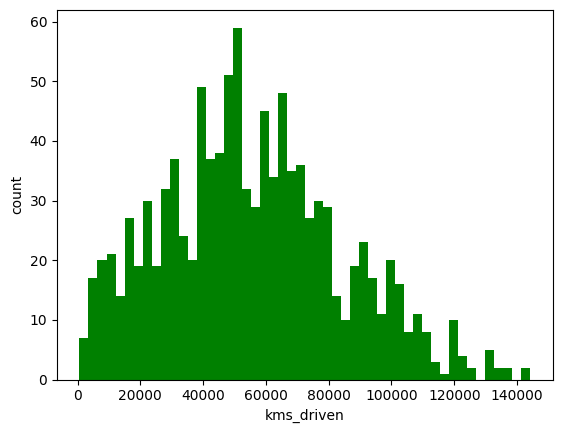

In [237]:
used_cars_df = used_cars_df[used_cars_df['kms_driven']<150000].reset_index(drop=True)

plt.hist(used_cars_df['kms_driven'], bins=50, color='green');

plt.xlabel('kms_driven');
plt.ylabel('count');

Alright, looks like we have a good range 

---

**Bonus task**


Try to do some analysis (perhaps plots and calculating simple metrics such as min, max, mean, std etc.) on each of these remaining columns. Is there something in particular you find interesting? 

Can we do something about it? If you find any notable outliers, remove them for now.

---

## Linear Regression

We'll begin our model fitting by limiting ourselves to a single feature.

We'll try to predict car prices using km_driven as the sole feature, for now. 

Note that this is obviously very limiting, but we do it for pedagocical reasons in order to both get used to the sk-learn package, and to learn an important lesson...

In other words, we'll now assume that we can model

$$ price = w_1 \cdot (kms\ driven) + w_0

In [238]:
X, y = used_cars_df['kms_driven'].values, used_cars_df['price(in lakhs)'].values

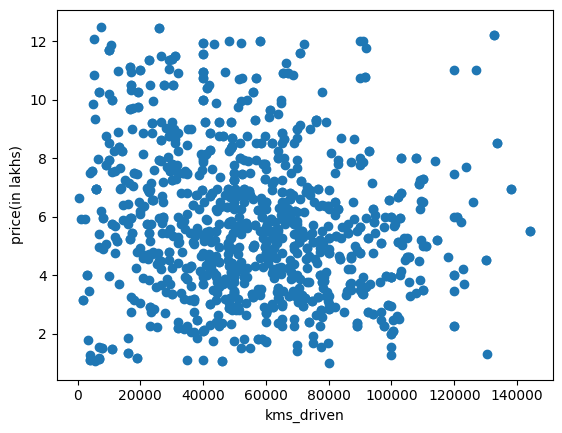

In [239]:
plt.scatter(X, y)
plt.xlabel('kms_driven');
plt.ylabel('price(in lakhs)');

#plt.ylim()

Train/test split

In [240]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40) # set a random state, so we can reproduce our results

print('Train set:')
print('X:', len(X_train))
print('y:', len(y_train), end='\n\n')

print('Test set:')
print('X:', len(X_test))
print('y:', len(y_test))

Train set:
X: 843
y: 843

Test set:
X: 211
y: 211


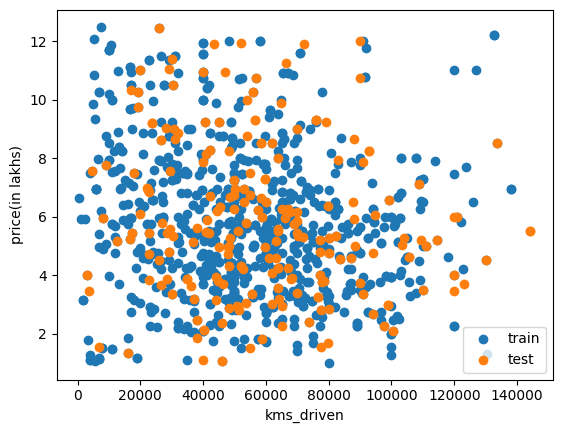

In [241]:
plt.scatter(X_train, y_train, label = 'train')
plt.scatter(X_test, y_test, label = 'test')

plt.xlabel('kms_driven');
plt.ylabel('price(in lakhs)');

plt.legend();

In [242]:
from scipy import stats

stats.pearsonr(used_cars_df['kms_driven'], used_cars_df['price(in lakhs)'])

PearsonRResult(statistic=-0.15145887640668343, pvalue=7.817982993461424e-07)

In [243]:
# import a linear regression model and the MSE-metric from sklearn

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [244]:
# this initialized a linear regression model. It has not trained on anything yet

linear_regression_model = LinearRegression()

These models require a 2D-input, but our current data is 1D

In [245]:
print(X_train.shape)
print(y_train.shape)

(843,)
(843,)


We can mitigate this using the .reshape method

In [246]:
X_train = X_train.reshape(len(X_train), 1)
y_train = y_train.reshape(len(y_train), 1)

print(X_train.shape)
print(y_train.shape)

(843, 1)
(843, 1)


Note that we can pass in a -1 in the .reshape method aswell, it then automatically tries to infer the dimension given your data

In [247]:
X_test = X_test.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

print(X_test.shape)
print(y_test.shape)

(211, 1)
(211, 1)


Let's train!

In [248]:
linear_regression_model.fit(X_train, y_train);

In [249]:
linear_regression_model.intercept_

array([6.56075835])

In [250]:
linear_regression_model.coef_

array([[-1.37799939e-05]])

In [251]:
y_train_hat = linear_regression_model.predict(X_train)
y_test_hat = linear_regression_model.predict(X_test)

In [252]:
# beräkna loss på train set

print(mean_squared_error(y_train, y_train_hat))

print(np.sqrt(mean_squared_error(y_train, y_train_hat)))

6.235339207809763
2.4970661200316187


In [253]:
# beräkna loss på test set

print(mean_squared_error(y_test, y_test_hat))

print(np.sqrt(mean_squared_error(y_test, y_test_hat)))

6.543771655384365
2.558079681203141


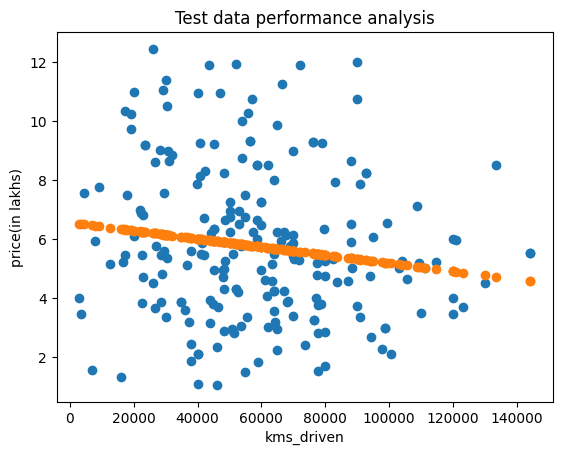

In [254]:
plt.scatter(X_test, y_test)
plt.scatter(X_test, y_test_hat)

plt.xlabel('kms_driven');
plt.ylabel('price(in lakhs)');
plt.title('Test data performance analysis');

Is the above result any good? Can you draw any conclusions?

If we really insisted, for some reason, on fitting a straight line to our data - what would be the correct course of action?

**Polynomial regression**

If we for some reason believe that a single feature in itself is not good enough, and that we might need powers of that feature, we can try to fit a polynomial model instead.

In [255]:
X_train.shape

(843, 1)

In [256]:
from sklearn.preprocessing import PolynomialFeatures

# assume that we want to create features for polynomial of degree two

poly_transform = PolynomialFeatures(degree=2, include_bias=False) # this initializes our transformer

X_train_polynomial = poly_transform.fit_transform(X_train)

X_test_polynomial = poly_transform.transform(X_test)           # not that we do NOT fit on the test set, only transform it. More on this later.



What we now have created are powers of our feature km_driven.

In other words, we now have two columns where each are

$km\ driven, (km\  driven)^2$

In [257]:
X_train_polynomial

array([[4.45250000e+04, 1.98247562e+09],
       [5.10300000e+03, 2.60406090e+07],
       [4.70000000e+04, 2.20900000e+09],
       ...,
       [6.00000000e+04, 3.60000000e+09],
       [1.20000000e+05, 1.44000000e+10],
       [3.11200000e+04, 9.68454400e+08]])

We can now use these as features for our linear regression model we imported earlier (which supports multiple features).

This would allow to model

$$ price = w_2 \cdot (km\ driven)^2 + w_1 \cdot (km\ driven) + w_0 $$

In [258]:
# initialize and fit the model

polynomial_regression_degree_2_model = LinearRegression()      # NOTERA ATT DEN HÄR KLARAR AV BÅDE EN ELLER FLERA FEATURES

polynomial_regression_degree_2_model.fit(X_train_polynomial, y_train)

LinearRegression()

In [259]:
polynomial_regression_degree_2_model.intercept_

array([7.13237125])

In [260]:
polynomial_regression_degree_2_model.coef_

array([[-3.9002836e-05,  2.1229756e-10]])

In [261]:
# predict and calculate loss

y_train_hat = polynomial_regression_degree_2_model.predict(X_train_polynomial)
y_test_hat = polynomial_regression_degree_2_model.predict(X_test_polynomial)

print('Train MSE:', mean_squared_error(y_train, y_train_hat))
print('Test MSE:', mean_squared_error(y_test, y_test_hat))

print('Train RMSE:', np.sqrt(mean_squared_error(y_train, y_train_hat)))
print('Test RMSE:', np.sqrt(mean_squared_error(y_test, y_test_hat)))

Train MSE: 6.1892661117932075
Test MSE: 6.5804398306247665
Train RMSE: 2.4878235692655553
Test RMSE: 2.565236798158167


Is that really better in any meaningul way? 

Hmm... Is there some sort of conclusion we can draw here?

What should we do?

---

## Challanges

**Task 1**

Clearly, trying to model car prices using km_driven alone atleast seems difficult with linear or polynomial models.

But if you were forced to do it anyway, what should we do? Look at the plots above and see if you can come up with an idea.

<details>
  <summary>Answer</summary>
  Predicting for both expensive and cheaper cars simultaneously with one model doesn't seem to be a good idea. We might get much better performance if we instead split those stratas and train a model on each seperately.
</details>



In [262]:
#used_cars_df = used_cars_df[used_cars_df['kms_driven']<150000].reset_index(drop=True)
used_cars_df = used_cars_df[used_cars_df['price(in lakhs)']<5.5].reset_index(drop=True)
used_cars_df


,seats,kms_driven,mileage(kmpl),engine(cc),max_power(bhp),torque(Nm),price(in lakhs)
0,5,42000,18.70,1199.0,1199.0,887.0,5.45
1,5,36739,18.90,1197.0,1197.0,8186.0,5.12
2,5,100525,16.10,1197.0,1197.0,85.0,2.09
3,5,40191,998.00,671.0,671.0,90.0,2.12
4,5,56215,21.40,1197.0,1197.0,831.0,5.03
...,...,...,...,...,...,...,...
516,5,65000,17.97,1498.0,1498.0,9961.0,2.95
517,5,30400,18.70,1199.0,1199.0,887.0,5.35
518,5,48650,23.59,1364.0,1364.0,6706.0,5.25
519,5,10000,999.00,6706.0,6706.0,91.0,3.98


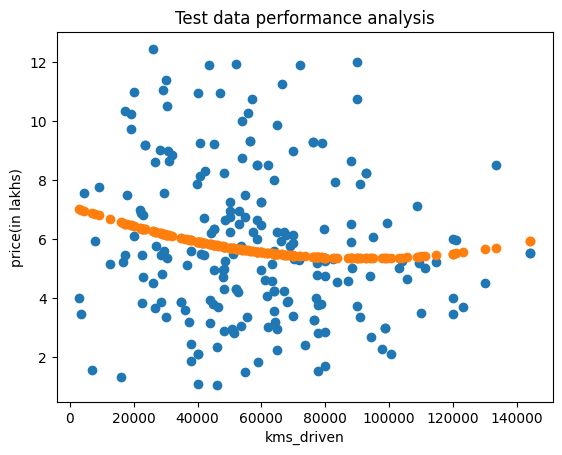

In [263]:
plt.scatter(X_test, y_test)
plt.scatter(X_test, y_test_hat)

plt.xlabel('kms_driven');
plt.ylabel('price(in lakhs)');
plt.title('Test data performance analysis');

In [264]:
X, y = used_cars_df['kms_driven'].values, used_cars_df['price(in lakhs)'].values

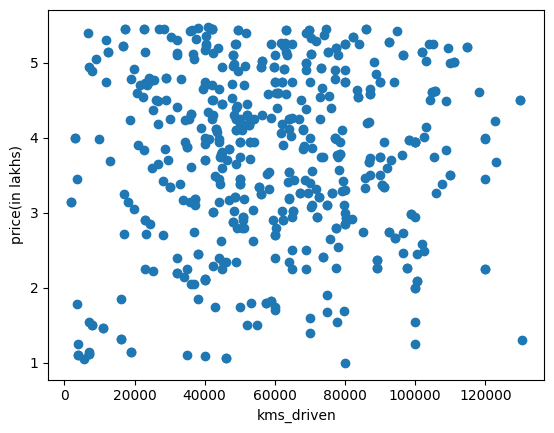

In [265]:
plt.scatter(X, y)
plt.xlabel('kms_driven');
plt.ylabel('price(in lakhs)');


In [266]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40) # set a random state, so we can reproduce our results

print('Train set:')
print('X:', len(X_train))
print('y:', len(y_train), end='\n\n')

print('Test set:')
print('X:', len(X_test))
print('y:', len(y_test))

Train set:
X: 416
y: 416

Test set:
X: 105
y: 105


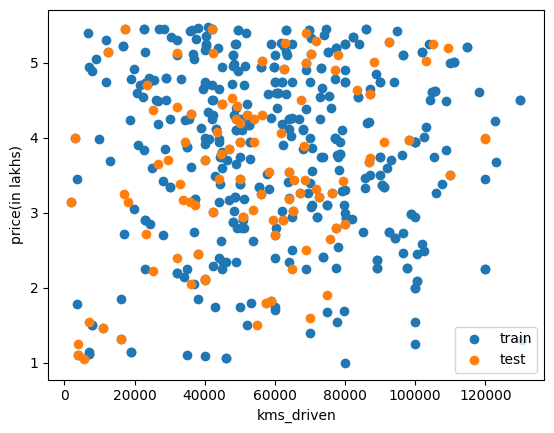

In [267]:
plt.scatter(X_train, y_train, label = 'train')
plt.scatter(X_test, y_test, label = 'test')

plt.xlabel('kms_driven');
plt.ylabel('price(in lakhs)');

plt.legend();

In [268]:
X_test.shape

(105,)

In [269]:
X_train = X_train.reshape(len(X_train), 1)
y_train = y_train.reshape(len(y_train), 1)

print(X_train.shape)
print(y_train.shape)

(416, 1)
(416, 1)


In [270]:
X_test = X_test.reshape(len(X_test), 1)
y_test = y_test.reshape(len(y_test), 1)

print(X_test.shape)
print(y_test.shape)

(105, 1)
(105, 1)


In [271]:
linear_regression_model.fit(X_train, y_train);

In [272]:
y_train_hat = linear_regression_model.predict(X_train)
y_test_hat = linear_regression_model.predict(X_test)

Text(0, 0.5, 'price(in lakhs)')

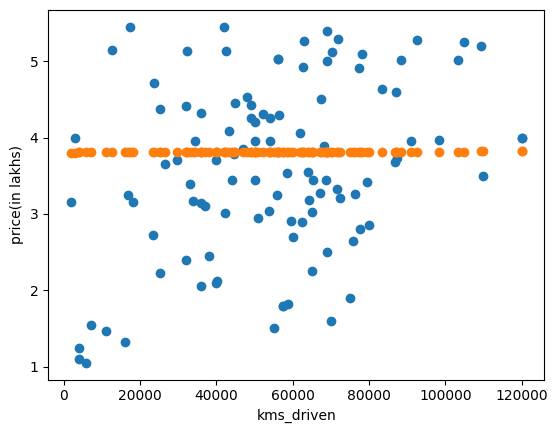

In [273]:
plt.scatter(X_test, y_test)
plt.scatter(X_test, y_test_hat)

plt.xlabel('kms_driven')
plt.ylabel('price(in lakhs)')


In [274]:
print(np.sqrt(mean_squared_error(y_test_hat,y_test)))

1.162353078211789


## polynomial version

In [275]:
# assume that we want to create features for polynomial of degree two

poly_transform = PolynomialFeatures(degree=2, include_bias=False) # this initializes our transformer

X_train_polynomial = poly_transform.fit_transform(X_train)

X_test_polynomial = poly_transform.transform(X_test)           # not that we do NOT fit on the test set, only transform it. More on this later.



In [276]:
print(len(X_train_polynomial))

416


In [277]:
X_train_polynomial

array([[8.36900000e+04, 7.00401610e+09],
       [1.18800000e+04, 1.41134400e+08],
       [7.00000000e+03, 4.90000000e+07],
       [7.85010000e+04, 6.16240700e+09],
       [4.36870000e+04, 1.90855397e+09],
       [3.71630000e+04, 1.38108857e+09],
       [1.72820000e+04, 2.98667524e+08],
       [4.85390000e+04, 2.35603452e+09],
       [2.30000000e+04, 5.29000000e+08],
       [6.88880000e+04, 4.74555654e+09],
       [3.94580000e+04, 1.55693376e+09],
       [7.50000000e+04, 5.62500000e+09],
       [1.07682000e+05, 1.15954131e+10],
       [7.64410000e+04, 5.84322648e+09],
       [7.80000000e+04, 6.08400000e+09],
       [4.40000000e+04, 1.93600000e+09],
       [4.60220000e+04, 2.11802448e+09],
       [7.72990000e+04, 5.97513540e+09],
       [2.50000000e+04, 6.25000000e+08],
       [4.23200000e+04, 1.79098240e+09],
       [6.40000000e+04, 4.09600000e+09],
       [6.00000000e+04, 3.60000000e+09],
       [4.01710000e+04, 1.61370924e+09],
       [1.65700000e+04, 2.74564900e+08],
       [1.000000

In [278]:
polynomial_regression_degree_2_model = LinearRegression()      # NOTERA ATT DEN HÄR KLARAR AV BÅDE EN ELLER FLERA FEATURES

polynomial_regression_degree_2_model.fit(X_train_polynomial, y_train)

LinearRegression()

In [279]:
polynomial_regression_degree_2_model.coef_

array([[ 1.59007948e-05, -1.26948683e-10]])

In [280]:

y_train_hat = polynomial_regression_degree_2_model.predict(X_train_polynomial)
y_test_hat = polynomial_regression_degree_2_model.predict(X_test_polynomial)

print('Train MSE:', mean_squared_error(y_train, y_train_hat))
print('Test MSE:', mean_squared_error(y_test, y_test_hat))

print('Train RMSE:', np.sqrt(mean_squared_error(y_train, y_train_hat)))
print('Test RMSE:', np.sqrt(mean_squared_error(y_test, y_test_hat)))

Train MSE: 1.336070480614712
Test MSE: 1.3211951017773427
Train RMSE: 1.155885150270005
Test RMSE: 1.149432512928594


Text(0, 0.5, 'price(in lakhs)')

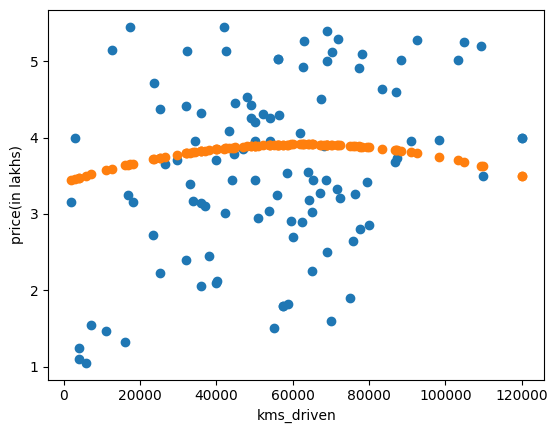

In [281]:
plt.scatter(X_test, y_test)
plt.scatter(X_test, y_test_hat)

plt.xlabel('kms_driven')
plt.ylabel('price(in lakhs)')

## now i try 3 degree for the funs tbh.

In [282]:
# assume that we want to create features for polynomial of degree two

poly_transform = PolynomialFeatures(degree=3, include_bias=False) # this initializes our transformer

X_train_polynomial = poly_transform.fit_transform(X_train)

X_test_polynomial = poly_transform.transform(X_test)       

In [283]:
polynomial_regression_degree_2_model = LinearRegression()      # NOTERA ATT DEN HÄR KLARAR AV BÅDE EN ELLER FLERA FEATURES

polynomial_regression_degree_2_model.fit(X_train_polynomial, y_train)

LinearRegression()

In [284]:

y_train_hat = polynomial_regression_degree_2_model.predict(X_train_polynomial)
y_test_hat = polynomial_regression_degree_2_model.predict(X_test_polynomial)

print('Train MSE:', mean_squared_error(y_train, y_train_hat))
print('Test MSE:', mean_squared_error(y_test, y_test_hat))

print('Train RMSE:', np.sqrt(mean_squared_error(y_train, y_train_hat)))
print('Test RMSE:', np.sqrt(mean_squared_error(y_test, y_test_hat)))

Train MSE: 1.3257684397631642
Test MSE: 1.2926745576757077
Train RMSE: 1.1514201838439189
Test RMSE: 1.1369584678763371


Text(0, 0.5, 'price(in lakhs)')

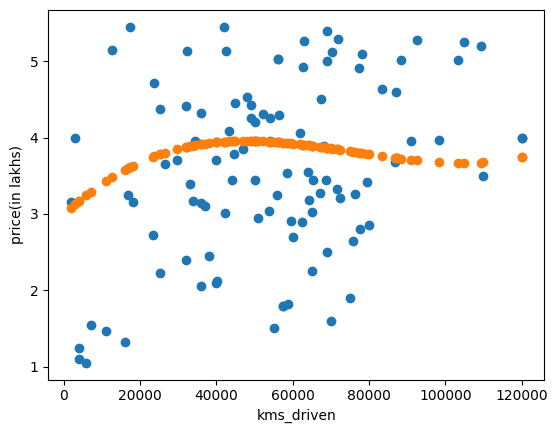

In [285]:
plt.scatter(X_test, y_test)
plt.scatter(X_test, y_test_hat)

plt.xlabel('kms_driven')
plt.ylabel('price(in lakhs)')

**Task 2**

Create two datasets from used_cars_df, called used_expensive_cars_df and used_cheap_cars_df. Define cheap to be a car that costs 12.5 lakh or less.

Train a linear model on the used_cheap_cars_df data and try to predict the sales price using only kms_driven.

What do you end up with? Is it better than before? 

*Hint:* You can use pretty much everything we've done above!

**Task 3**

Instead of kms_driven, now try using one of the other available features to model price. Do you get better performance? Limit your analysis to cheap cars.

Which of the feature seem to be the single best one at predicting car price?

*Hint:* You might need to deal with some unreasonable data in the other features aswell.



In [286]:
used_cars_df = pd.read_csv('used_cars.csv')

columns_to_keep = used_cars_df.columns[1:]

used_cars_df = used_cars_df[columns_to_keep]

used_cars_df

,car_name,registration_year,insurance_validity,fuel_type,seats,kms_driven,ownsership,transmission,manufacturing_year,mileage(kmpl),engine(cc),max_power(bhp),torque(Nm),price(in lakhs)
0,2017 Mercedes-Benz S-Class S400,Jul-17,Comprehensive,Petrol,5,56000,First Owner,Automatic,2017,7.81,2996.0,2996.0,333.0,63.75
1,2020 Nissan Magnite Turbo CVT XV Premium Opt BSVI,Jan-21,Comprehensive,Petrol,5,30615,First Owner,Automatic,2020,17.40,999.0,999.0,9863.0,8.99
2,2018 BMW X1 sDrive 20d xLine,Sep-18,Comprehensive,Diesel,5,24000,First Owner,Automatic,2018,20.68,1995.0,1995.0,188.0,23.75
3,2019 Kia Seltos GTX Plus,Dec-19,Comprehensive,Petrol,5,18378,First Owner,Manual,2019,16.50,1353.0,1353.0,13808.0,13.56
4,2019 Skoda Superb LK 1.8 TSI AT,Aug-19,Comprehensive,Petrol,5,44900,First Owner,Automatic,2019,14.67,1798.0,1798.0,17746.0,24.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1548,2020 Hyundai Creta SX Opt Diesel AT BSVI,Aug-20,Comprehensive,Diesel,5,35000,First Owner,Automatic,2020,1493.00,11345.0,11345.0,250.0,17.41
1549,2022 Renault KWID 1.0 RXL Opt BSVI,2022,Third Party insurance,Petrol,5,10000,999 cc,2022,Power Steering,999.00,6706.0,6706.0,91.0,3.98
1550,2017 Honda WR-V i-VTEC S,Jun-17,Comprehensive,Petrol,5,49000,First Owner,Manual,2017,17.50,1199.0,1199.0,887.0,5.85
1551,2018 Volkswagen Polo 1.0 MPI Comfortline,May-18,Comprehensive,Petrol,5,40000,Second Owner,Manual,2018,18.78,999.0,999.0,75.0,4.75


In [287]:
used_cars_df = used_cars_df.dropna().reset_index(drop=True)

used_cars_df = used_cars_df.select_dtypes(include=['int64', 'float64'])


In [288]:
used_cheap_cars_df = used_cars_df[used_cars_df['price(in lakhs)']<12.5].reset_index(drop=True)

used_expensive_cars_df = used_cars_df[used_cars_df['price(in lakhs)']>12.5].reset_index(drop=True)

used_cheap_cars_df


,seats,kms_driven,mileage(kmpl),engine(cc),max_power(bhp),torque(Nm),price(in lakhs)
0,5,30615,17.40,999.0,999.0,9863.0,8.99
1,5,42000,18.70,1199.0,1199.0,887.0,5.45
2,5,36739,18.90,1197.0,1197.0,8186.0,5.12
3,5,76000,15.80,1591.0,1591.0,1213.0,9.30
4,5,28783,17.00,1198.0,1198.0,1085.0,8.02
...,...,...,...,...,...,...,...
1060,7,26500,26.11,1462.0,1462.0,8663.0,11.50
1061,5,10000,999.00,6706.0,6706.0,91.0,3.98
1062,5,49000,17.50,1199.0,1199.0,887.0,5.85
1063,5,40000,18.78,999.0,999.0,75.0,4.75


In [289]:
used_cheap_cars_df['max_power(bhp)'] = used_cheap_cars_df['max_power(bhp)'].astype(int)


In [290]:
used_cheap_cars_df[used_cheap_cars_df['max_power(bhp)']<0]


,seats,kms_driven,mileage(kmpl),engine(cc),max_power(bhp),torque(Nm),price(in lakhs)
274,7,19000,2925.0,3.258640e+12,-2147483648,700.0,1.15
285,7,19000,2925.0,3.258640e+12,-2147483648,700.0,1.15
422,7,16000,2925.0,3.258640e+12,-2147483648,700.0,1.32
433,7,16000,2925.0,3.258640e+12,-2147483648,700.0,1.32
546,7,46001,2925.0,3.258640e+12,-2147483648,700.0,1.06
557,7,46001,2925.0,3.258640e+12,-2147483648,700.0,1.06
998,7,34987,2925.0,3.258640e+12,-2147483648,700.0,1.10


In [291]:
used_cheap_cars_df = used_cheap_cars_df[used_cheap_cars_df['max_power(bhp)']>350]


In [292]:
used_cheap_cars_df = used_cheap_cars_df[used_cheap_cars_df['max_power(bhp)']<2300]


In [293]:
X, y = used_cheap_cars_df['max_power(bhp)'].values, used_cheap_cars_df['price(in lakhs)'].values

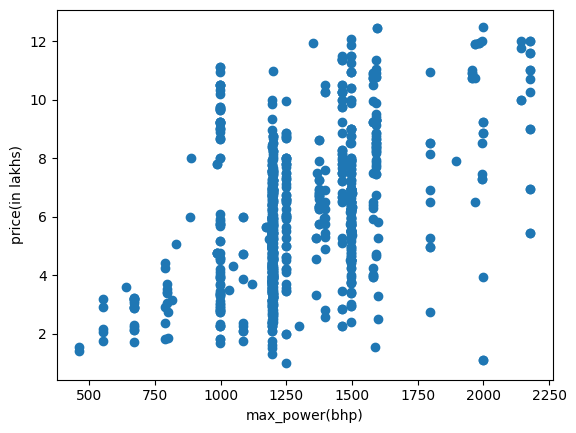

In [294]:
plt.scatter(X, y)
plt.xlabel('max_power(bhp)');
plt.ylabel('price(in lakhs)');

In [295]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40) # set a random state, so we can reproduce our results

print('Train set:')
print('X:', len(X_train))
print('y:', len(y_train), end='\n\n')

print('Test set:')
print('X:', len(X_test))
print('y:', len(y_test))

Train set:
X: 748
y: 748

Test set:
X: 188
y: 188


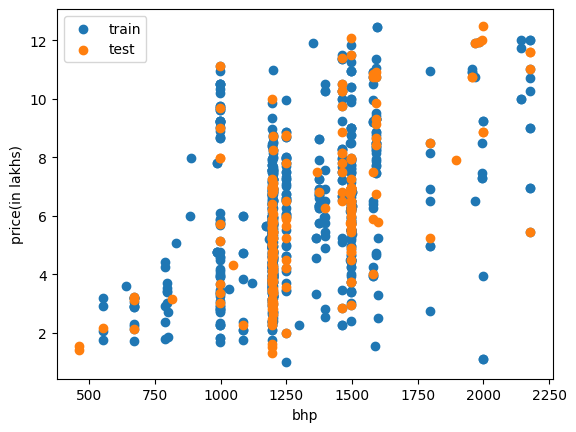

In [296]:
plt.scatter(X_train, y_train, label = 'train')
plt.scatter(X_test, y_test, label = 'test')

plt.xlabel('bhp');
plt.ylabel('price(in lakhs)');

plt.legend();

In [297]:
X_test = X_test.reshape(-1, 1)
X_train = X_train.reshape(-1, 1)
y_test = y_test.reshape(-1,1)
y_train = y_train.reshape(-1,1)


print(X_test.shape)
print(X_train.shape)
print(y_test.shape)
print(y_train.shape)


(188, 1)
(748, 1)
(188, 1)
(748, 1)


In [298]:
linear_regression_model.fit(X_train, y_train)

LinearRegression()

In [299]:
y_train_hat = linear_regression_model.predict(X_train)
y_test_hat = linear_regression_model.predict(X_test)

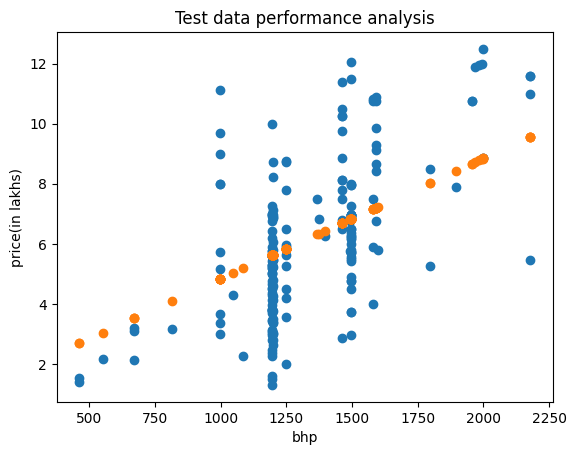

In [300]:
plt.scatter(X_test, y_test)
plt.scatter(X_test, y_test_hat)

plt.xlabel('bhp');
plt.ylabel('price(in lakhs)');
plt.title('Test data performance analysis');

In [301]:

print('Train MSE:', mean_squared_error(y_train, y_train_hat))
print('Test MSE:', mean_squared_error(y_test, y_test_hat))

print('Train RMSE:', np.sqrt(mean_squared_error(y_train, y_train_hat)))
print('Test RMSE:', np.sqrt(mean_squared_error(y_test, y_test_hat)))

Train MSE: 4.540134836542396
Test MSE: 4.436533259679761
Train RMSE: 2.1307592159937725
Test RMSE: 2.1063079688591984


## poly version

In [302]:

poly_transform = PolynomialFeatures(degree=2, include_bias=False) # this initializes our transformer

X_train_polynomial = poly_transform.fit_transform(X_train)

X_test_polynomial = poly_transform.transform(X_test)           # not that we do NOT fit on the test set, only transform it. More on this later.



In [303]:
polynomial_regression_degree_2_model = LinearRegression()      # NOTERA ATT DEN HÄR KLARAR AV BÅDE EN ELLER FLERA FEATURES

polynomial_regression_degree_2_model.fit(X_train_polynomial, y_train)

LinearRegression()

In [304]:
y_train_hat = polynomial_regression_degree_2_model.predict(X_train_polynomial)
y_test_hat = polynomial_regression_degree_2_model.predict(X_test_polynomial)

print('Train MSE:', mean_squared_error(y_train, y_train_hat))
print('Test MSE:', mean_squared_error(y_test, y_test_hat))

print('Train RMSE:', np.sqrt(mean_squared_error(y_train, y_train_hat)))
print('Test RMSE:', np.sqrt(mean_squared_error(y_test, y_test_hat)))

Train MSE: 4.538740422515309
Test MSE: 4.452847497497665
Train RMSE: 2.1304319802601794
Test RMSE: 2.1101771246740557


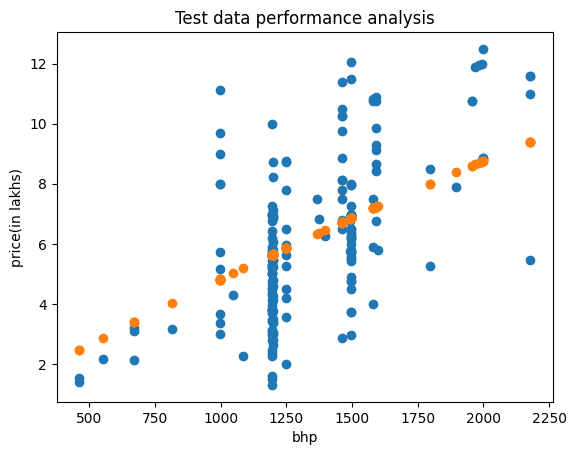

In [305]:
plt.scatter(X_test, y_test)
plt.scatter(X_test, y_test_hat)

plt.xlabel('bhp');
plt.ylabel('price(in lakhs)');
plt.title('Test data performance analysis');

## more poly degrees than 2.

In [306]:

poly_transform = PolynomialFeatures(degree=4, include_bias=False) # this initializes our transformer

X_train_polynomial = poly_transform.fit_transform(X_train)

X_test_polynomial = poly_transform.transform(X_test)

In [307]:
polynomial_regression_degree_2_model = LinearRegression()      # NOTERA ATT DEN HÄR KLARAR AV BÅDE EN ELLER FLERA FEATURES

polynomial_regression_degree_2_model.fit(X_train_polynomial, y_train)

LinearRegression()

In [308]:
y_train_hat = polynomial_regression_degree_2_model.predict(X_train_polynomial)
y_test_hat = polynomial_regression_degree_2_model.predict(X_test_polynomial)

print('Train MSE:', mean_squared_error(y_train, y_train_hat))
print('Test MSE:', mean_squared_error(y_test, y_test_hat))

print('Train RMSE:', np.sqrt(mean_squared_error(y_train, y_train_hat)))
print('Test RMSE:', np.sqrt(mean_squared_error(y_test, y_test_hat)))

Train MSE: 4.522871115710879
Test MSE: 4.350824643480403
Train RMSE: 2.1267042849702635
Test RMSE: 2.085863045235809


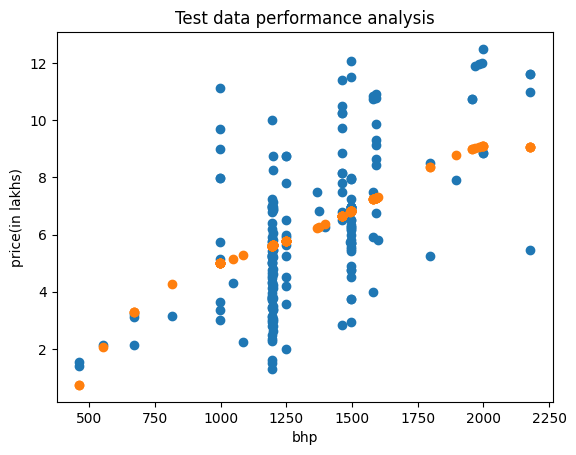

In [309]:
plt.scatter(X_test, y_test)
plt.scatter(X_test, y_test_hat)

plt.xlabel('bhp');
plt.ylabel('price(in lakhs)');
plt.title('Test data performance analysis');

**Task 4**

We have not learned how to work with non-numeric columns yet as features for ML-models. However, see if you still can try to analyze the original columns we removed. Look for outliers, faulty data and other irregularities